In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def image2vec(image):
    return image.flatten()


def vec2image(vec):
    return vec.reshape(28, 28)


def read_mnist(normalize=True):
    labels = np.load('../dataset/train-labels.npy').astype(int)
    images = np.load('../dataset/train-images.npy').astype(float)
    if normalize:
        images = images / 255  # rescale to be between 0 and 1
    return images, labels


class MnistPlotter:
    """ Helper class for visualizing digits easily """

    # plot params to make figures nice
    size = 28
    cmap = 'Greys'
    dpi = 96
    lw = lw = dpi / (1024*32)

    def draw_image(self, image, label=None):
        # params
        figsize = (6, 6)

        # plot
        fig = plt.figure(figsize=figsize, dpi=self.dpi)
        ax1 = fig.add_subplot(111)
        self._draw_single_image(ax1, image, label)

        return fig

    def draw_two_images(self, im1, im2):
        # params
        figsize = (12, 6)

        # plot
        fig = plt.figure(figsize=figsize, dpi=self.dpi)
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        for ax, image in zip([ax1, ax2], [im1, im2]):
            self._draw_single_image(ax, image)

        return fig

    def draw_three_images(self, im1, im2, im3, **kwargs):

        # params
        figsize = (18, 6)

        # plot
        fig = plt.figure(figsize=figsize, dpi=self.dpi)
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)

        for ax, image in zip([ax1, ax2, ax3], [im1, im2, im3]):
            self._draw_single_image(ax, image, **kwargs)

        return fig

    def _draw_single_image(self, ax, image, label=None, fs=50, **kwargs):

        # default kwargs
        default_kwargs = dict(vmin=0, vmax=1, edgecolor='k', lw=self.lw)
        default_kwargs.update(kwargs)

        # params
        lw_border = 6
        lim = [0, self.size]

        # plot image
        cmap = plt.get_cmap(self.cmap)
        ax.pcolormesh(image, cmap=cmap, **default_kwargs)

        # draw boundaries
        for v in [0, self.size]:
            ax.plot([v, v], lim, lw=lw_border, color='k')
            ax.plot(lim, [v, v], lw=lw_border, color='k')

        # handle axis
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.set_axis_off()

        # draw label
        if label is not None:
            ax.text(0.03, 0.84, str(label), fontsize=fs, color='k', transform=ax.transAxes)

Using 75 components, explained variance is 0.9182344360507502


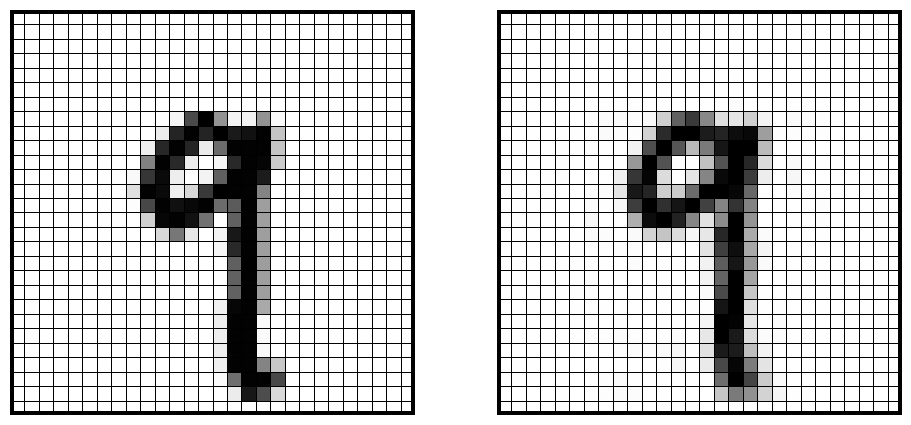

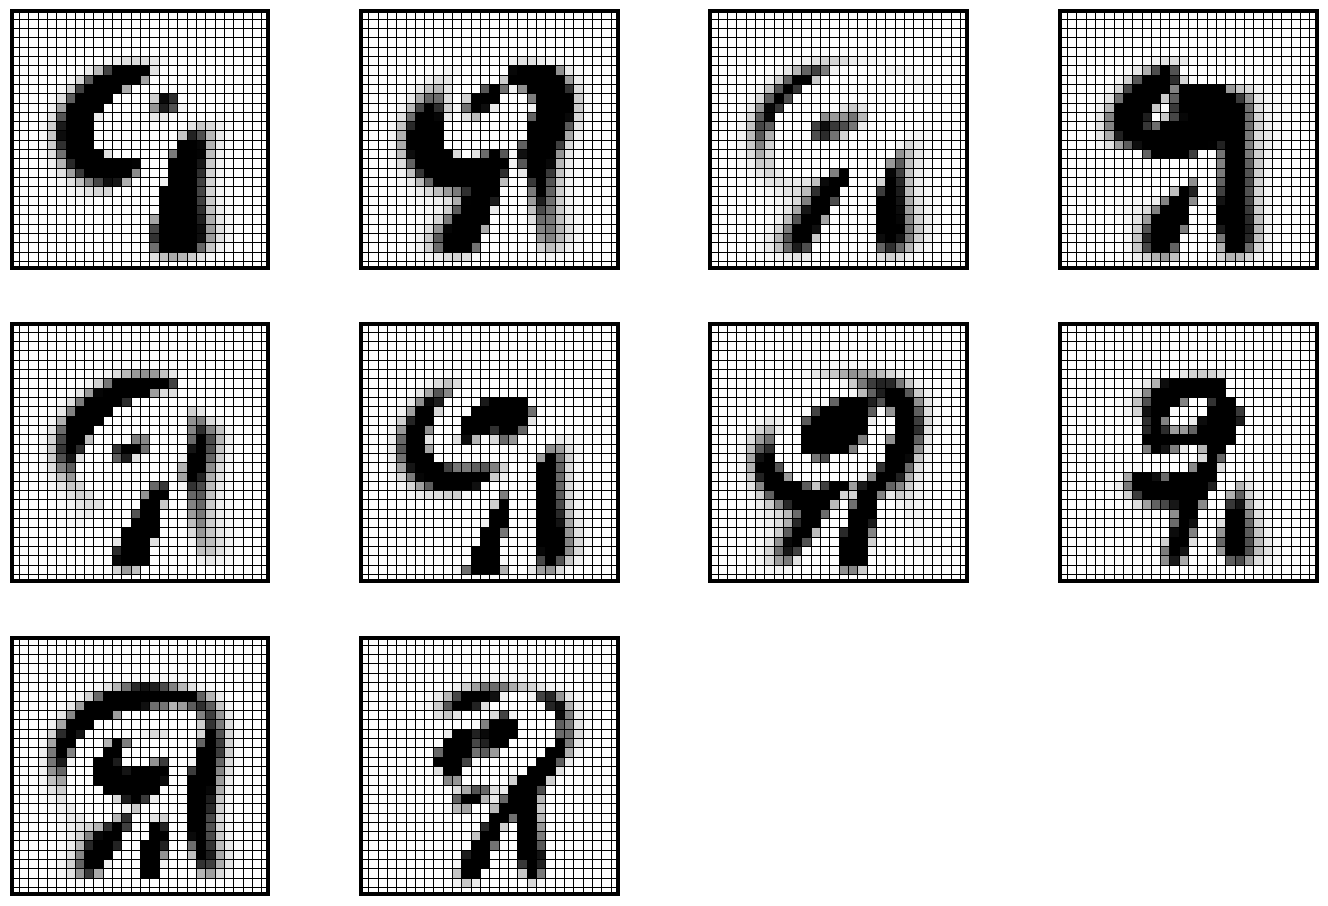

In [3]:
# parameters
n_components = 75
digits = [9]
    
# read data
images, labels = read_mnist()
mask = np.array([l in digits for l in labels])
images = images[mask]
labels = labels[mask]

# setup
plotter = MnistPlotter()

# run PCA
X = np.array([image2vec(im) for im in images])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)
images_rec = [vec2image(x) for x in X_rec]

# print result
explained_variance = pca.explained_variance_ratio_.sum()
print('Using {} components, explained variance is {}'.format(n_components, explained_variance))


# showcase reconstruction
i = 20
plotter.draw_two_images(images[i], images_rec[i])

# plot principal images
n = 10
fig = plt.figure(figsize=(18, 12), dpi=96)
for i in range(n):
    ax = fig.add_subplot(3, 4, i+1)
    image = 26 * vec2image(pca.components_[i])
    plotter._draw_single_image(ax, image, label=None)

plt.show()



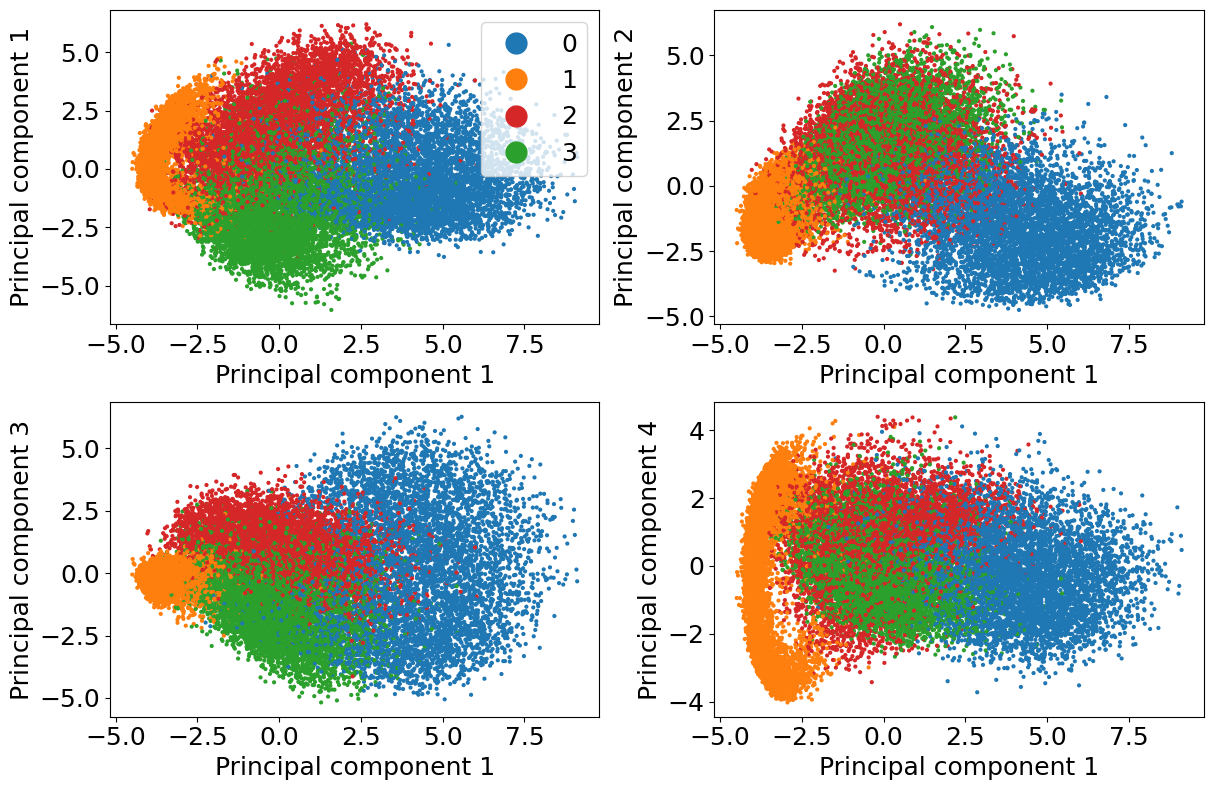

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tools import read_mnist, image2vec, vec2image

# parameters
n_components = 75
digits = [0, 1, 2, 3]

# read data
images, labels = read_mnist()
mask = np.array([l in digits for l in labels])
images = images[mask]
labels = labels[mask]

# run PCA
X = np.array([image2vec(im) for im in images])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)
images_rec = [vec2image(x) for x in X_rec]


# colors
color_dict = {0: 'tab:blue',
              1: 'tab:orange',
              2: 'tab:red',
              3: 'tab:green',
              4: 'tab:purple',
              5: 'k',
              6: 'tab:olive',
              7: 'tab:brown',
              8: 'tab:cyan',
              9: 'tab:pink'}
colors = [color_dict[l] for l in labels]

# plot params
ms1 = 4
ms2 = 15
fs = 18

# setup
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# plot clustering
for ax, i in zip([ax1, ax2, ax3, ax4], [1, 2, 3, 4]):
    x = X_pca[:, 0]
    y = X_pca[:, i]
    ax.scatter(x, y, c=colors, s=ms1)
    ax.set_xlabel('Principal component 1', fontsize=fs)
    ax.set_ylabel('Principal component {}'.format(i), fontsize=fs)
    ax.tick_params(labelsize=fs)

# legend
for d in digits:
    ax1.plot(np.nan, np.nan, 'o', ms=ms2, label=str(d), color=color_dict[d])
ax1.legend(loc=1, fontsize=fs)


fig.tight_layout()
plt.show()
